**Ecommerce Data**

In [5]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload() 

Saving data.csv to data.csv


In [18]:
ecommerce = pd.read_csv("data.csv",encoding='latin1')
freshData=ecommerce[ecommerce['Quantity'] > 0]
freshData=freshData[freshData['CustomerID'] > 0.1]
freshData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
country1000=(freshData['Country'].value_counts())
print(country1000)
country1000=country1000[country1000>1000]
country1000.keys()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway'],
      dtype='object')

***Get data with only Germany country***

In [20]:
samplingData=freshData[freshData['Country']=='Germany']
samplingData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany


**PART 1** Bootstrap Function 

In [9]:
sampleMean=[]
sampleStd=[]
samplingData['TotalPrice']=samplingData['Quantity']*samplingData['UnitPrice']
samplingData=samplingData.groupby(['InvoiceNo']).sum()
def Bootstrap(data,times):
  for i in range(0,times):
    samples=np.random.choice(data, replace=True, size=len(data))
    sampleMean.append(samples.mean())
    sampleStd.append(samples.std())
Bootstrap(samplingData['TotalPrice'],40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**PART 2** JackKnife Function (Run this in stead of Bootstrap)

In [21]:
sampleMean=[]
sampleStd=[]
samplingData['TotalPrice']=samplingData['Quantity']*samplingData['UnitPrice']
samplingData=samplingData.groupby(['InvoiceNo']).sum()
def JackKnife(data,times):
  for i in range(0,times):
    samples=np.random.choice(data, size=len(data)-1)
    sampleMean.append(samples.mean())
    sampleStd.append(samples.std())
JackKnife(samplingData['TotalPrice'],40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**CALCULATING PART **

In [22]:
bootMean=np.mean(sampleMean)
bootStd=np.mean(sampleStd)

bootMean, bootStd

(503.62598684210525, 586.462246302274)

**PLOT**

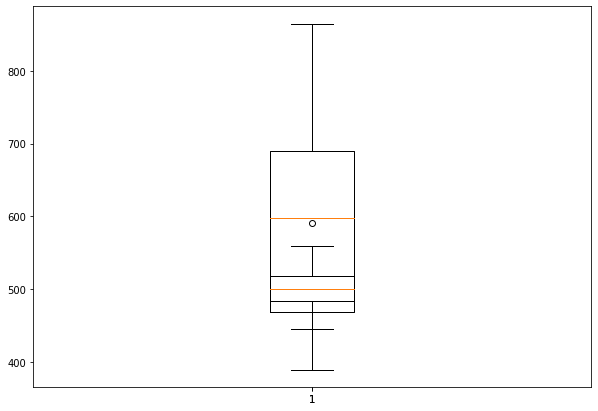

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
 #BoxPlot
# Creating plot
plt.boxplot(sampleMean)
plt.boxplot(sampleStd)

# show plot
plt.show()

<BarContainer object of 40 artists>

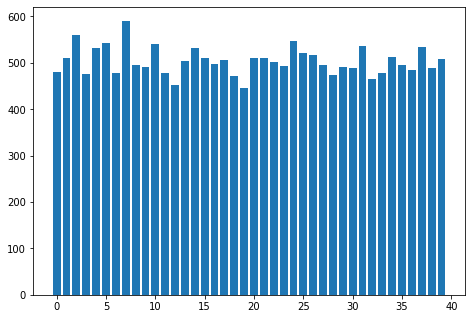

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axes=list(range(0,40))
ax.bar(x_axes,sampleMean)

<BarContainer object of 40 artists>

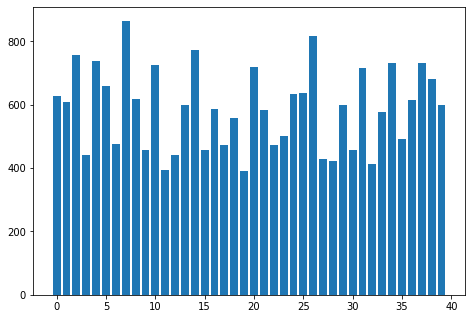

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axes=list(range(0,40))  
ax.bar(x_axes,sampleStd)

*Standard Error*

In [26]:
from scipy.stats import sem
sem(sampleStd)

20.271726361473412

In [27]:
sem(sampleMean)

4.656002552131809

***PART 1 CONFIDENT INTERVAL***

Confident Intervals of Mean

In [16]:
np.percentile(sampleMean, [2.5, 97.5])

array([465.80216193, 540.33354923])

Confident Intervals of Standard Deviation

In [17]:
np.percentile(sampleStd, [2.5, 97.5])

array([412.06936178, 840.10612453])

***JackKnifeConfident Interval***

In [28]:
meanVar = (41-1)*np.var(sampleMean)
stdVar=(41-1)*np.var(sampleStd)

meanVar, stdVar

(33818.24123411436, 641070.9078921515)

MEAN

In [ ]:
# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = sampleMean - 1.96 * np.sqrt(meanVar)
jk_upper_ci = sampleMean + 1.96 * np.sqrt(meanVar)

jk_lower_ci, jk_upper_ci

(array([ -2928.26707331,  -5282.56391541, -12862.68667857,  -7849.3154505 ,
         -5136.10406892,  -7376.14556015,  -9513.63740225,  -8021.14865225,
        -10252.6471391 ,  -9497.8219198 ,  -9776.1722926 ,  -9251.88650313,
         -9066.7289812 ,  -1620.66762155,  -7964.0425119 ,  -8659.25242418,
         -5272.81549436,  -3761.10244611,  -7874.17152506,  -5267.18231453,
         -6831.49946366,  -3119.27132769,  -8892.65998997, -12686.01433208,
         -9607.4685426 ,  -8325.54266541,  -2473.42029699,  -4930.30042857,
         -9533.73231453, -11339.90395927, -10902.16060401,  -4581.58608646,
         -7947.28281892,  -9863.11549436, -11472.52700752,  -3756.29437594,
         -5219.47630576,  -5974.66968296,  -5058.94529699,  -8632.05608646]),
 array([67393.11738032, 65038.82053822, 57458.69777506, 62472.06900313,
        65185.28038471, 62945.23889348, 60807.74705138, 62300.23580138,
        60068.73731453, 60823.56253383, 60545.21216103, 61069.4979505 ,
        61254.65547243

Standard Deviation

In [ ]:
# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = sampleStd - 1.96 * np.sqrt(stdVar)
jk_upper_ci = sampleStd + 1.96 * np.sqrt(stdVar)

jk_lower_ci, jk_upper_ci

(array([ -66155.91349655,  -82877.05228188, -124628.94720808,
        -104451.00126263,  -84806.04258212,  -92409.40369374,
        -103521.40377288,  -89927.57410956, -110483.44431567,
        -102464.39875462,  -97610.63942617,  -92853.90923305,
        -108383.05856856,  -73955.10061326,  -88712.95574126,
        -104719.10225949,  -88083.45823078,  -80180.42394821,
         -96552.13234999,  -78593.23698916, -103667.56093364,
         -76368.71077703,  -84252.1935526 , -113304.36214919,
        -104026.07203299, -104591.74418264,  -82318.99366846,
         -85850.82012512, -101514.83707292, -106367.37963671,
        -101701.83003585,  -82235.34609187,  -95080.27510683,
        -105106.72348589, -119456.63497506,  -95785.87211811,
         -85384.06720924,  -86992.86188904,  -76324.38050831,
         -99424.97595833]),
 array([253372.5704652 , 236651.43167987, 194899.53675366, 215077.48269912,
        234722.44137963, 227119.08026801, 216007.08018887, 229600.90985219,
        209045